## Nikita Nagraj

Task # 2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [ ]:
data=pd.read_csv(url)

## Display first five rows from data

In [ ]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization

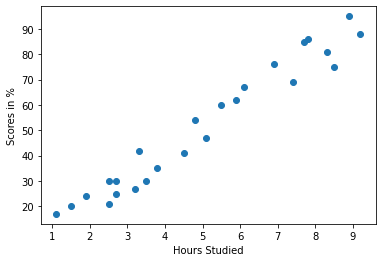

In [ ]:
plt.scatter(data.Hours, data.Scores)
plt.xlabel("Hours Studied")
plt.ylabel("Scores in %")
plt.show()

## According to visualization we can say that as study hours increases the score is also increasing. (Positive Linear Trend)

In [ ]:
#prepare data for training
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
#import Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Plot regressor line

In [ ]:
reg.coef_

array([9.91065648])

In [ ]:
reg.intercept_

2.018160041434662

In [ ]:
line=reg.coef_*X+reg.intercept_

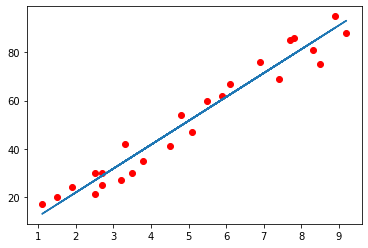

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,line)
plt.show()

# Prediction

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
# compare actual and predicted score based on study hours
dataframe=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [ ]:
dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
## predict score for 9.25 hours of study
hours=9.25
#pred_score=reg.coef_*hours+reg.intercept_
#print(pred_score)
predict_score=reg.predict([[hours]]).round(2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict_score[0]))

No of Hours = 9.25
Predicted Score = 93.69


## if student study for 9.25 hours in a day then predicted score is 93.69%

# Evaluate Model

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))


Mean Absolute Error: 4.183859899002982


In [ ]:
print("r2 score:",metrics.r2_score(y_test,y_pred))

r2 score: 0.9454906892105354
